In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
ingredient_graph = nx.read_gml(r"graphs/ingredients_weighted_graph.gml")

In [6]:
for node in ingredient_graph.nodes(data=True):
    print(node)


('meatloaf', {})
('bacon', {})
('cheese', {})
('butter', {})
('eggs', {})
('spinach', {})
('onion', {})
('pepper', {})
('potatoes', {})
('garlic', {})
('salt', {})
('olive oil', {})
('beef', {})
('taco', {})
('shell', {})
('lettuce', {})
('tomatoes', {})
('salsa', {})
('cheddar', {})
('corn', {})
('pork', {})
('bean', {})
('tomato', {})
('beef broth', {})
('chip', {})
('bouillon', {})
('sazón', {})
('cinnamon', {})
('chili', {})
('cumin', {})
('coriander', {})
('sugar', {})
('chocolate', {})
('milk', {})
('flour', {})
('cream', {})
('apple', {})
('lemon', {})
('macaroni', {})
('water', {})
('cornstarch', {})
('paprika', {})
('vinegar', {})
('ketchup', {})
('applesauce', {})
('ponzu', {})
('syrup', {})
('smoke', {})
('cider', {})
('oregano', {})
('cayenne', {})
('egg', {})
('olive', {})
('pepperoni', {})
('mushroom', {})
('mozzarella', {})
('pizza', {})
('celery', {})
('molasses', {})
('worcestershire', {})
('buns', {})
('seltzer', {})
('panko', {})
('oil', {})
('yeast', {})
('basil', {

In [7]:
def visualize_ingredient_graph(G, top_n=20):
    top_ingredients = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
    top_graph = G.subgraph([ing for ing, _ in top_ingredients])

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(top_graph, k=0.5, iterations=50)

    nx.draw(
        top_graph,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=[top_graph.degree(node) * 20 for node in top_graph.nodes()],
        font_size=8,
        edge_color='gray',
        alpha=0.7
    )

    edge_labels = nx.get_edge_attributes(top_graph, 'weight')
    nx.draw_networkx_edge_labels(top_graph, pos, edge_labels=edge_labels, font_size=7)

    plt.title("Top Ingredient Connections")
    plt.tight_layout()
    plt.show()


In [8]:

def analyze_ingredient_popularity(df):
    ingredient_popularity = defaultdict(list)
    
    for _, row in df.iterrows():
        ingredients = row['clean_ingredients']
        rating = row['average_rating']
        
        for ing in ingredients:
            ingredient_popularity[ing].append(rating)
    
    ingredient_impact = {}
    for ing, ratings in ingredient_popularity.items():
        ingredient_impact[ing] = {
            'avg_rating': sum(ratings) / len(ratings),
            'frequency': len(ratings),
            'total_rating_impact': sum(ratings)
        }
    
    sorted_ingredients = sorted(
        ingredient_impact.items(), 
        key=lambda x: x[1]['total_rating_impact'], 
        reverse=True
    )
    
    print("\nTop Ingredients by Popularity Impact:")
    for ing, data in sorted_ingredients[:10]:
        print(f"Ingredient: {ing}")
        print(f"  Average Rating: {data['avg_rating']:.2f}")
        print(f"  Frequency in Recipes: {data['frequency']}")
        print(f"  Total Rating Impact: {data['total_rating_impact']:.2f}")
        print()


C:\Users\vassa\AppData\Local\Temp\ipykernel_24368\1263557226.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


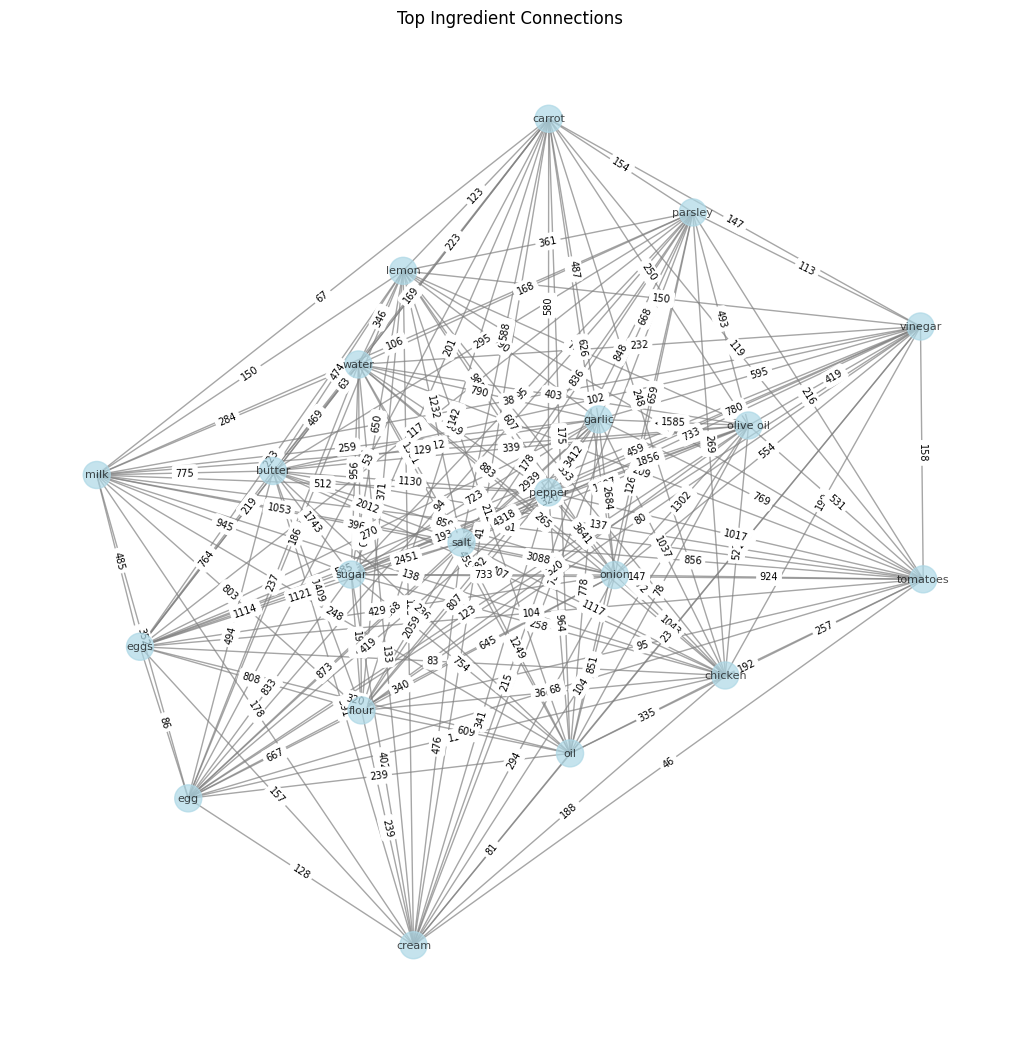

In [9]:
visualize_ingredient_graph(ingredient_graph)

Answering Specific Questions
1. Which ingredient combinations are most frequently used together, and how do they influence recipe popularity?
After loading the graph and co-occurrence data:

Use get_top_ingredient_combinations to find the most frequent ingredient pairs.
Look at the avg_rating and avg_raters in the output to analyze their influence on popularity.


2. Which ingredient has the most influence on recipe popularity?
Use analyze_ingredient_popularity to calculate the total rating impact (total_rating_impact) and sort the ingredients.

In [10]:
def get_top_ingredient_combinations_from_graph(G, top_n=10):
    top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
    
    print("Top Ingredient Combinations by Co-occurrence:")
    for u, v, data in top_edges:
        print(f"Ingredients: ({u}, {v})")
        print(f"  Co-occurrence Count (Weight): {data['weight']}")


In [11]:
get_top_ingredient_combinations_from_graph(ingredient_graph)

Top Ingredient Combinations by Co-occurrence:
Ingredients: (pepper, salt)
  Co-occurrence Count (Weight): 4318
Ingredients: (onion, pepper)
  Co-occurrence Count (Weight): 3641
Ingredients: (pepper, garlic)
  Co-occurrence Count (Weight): 3412
Ingredients: (onion, salt)
  Co-occurrence Count (Weight): 3088
Ingredients: (garlic, salt)
  Co-occurrence Count (Weight): 2939
Ingredients: (onion, garlic)
  Co-occurrence Count (Weight): 2684
Ingredients: (salt, sugar)
  Co-occurrence Count (Weight): 2451
Ingredients: (salt, flour)
  Co-occurrence Count (Weight): 2059
Ingredients: (butter, salt)
  Co-occurrence Count (Weight): 2012
Ingredients: (sugar, flour)
  Co-occurrence Count (Weight): 1901


In [12]:
def get_top_ingredient_combinations_by_popularity(G, top_n=10):
    top_edges = sorted(
        G.edges(data=True), 
        key=lambda x: x[2].get('avg_rating', 0), 
        reverse=True
    )[:top_n]
    
    print("Top Ingredient Combinations by Recipe Popularity:")
    for u, v, data in top_edges:
        avg_rating = data.get('avg_rating', None)
        avg_raters = data.get('avg_raters', None)
        if isinstance(avg_rating, (int, float)) and isinstance(avg_raters, (int, float)):
            print(f"Ingredients: ({u}, {v})")
            print(f"  Average Recipe Rating: {avg_rating:.2f}")
            print(f"  Average Number of Raters: {avg_raters:.2f}")
        else:
            print(f"Ingredients: ({u}, {v})")
            print("  Average Recipe Rating: N/A")
            print("  Average Number of Raters: N/A")


In [13]:
get_top_ingredient_combinations_by_popularity(ingredient_graph)

Top Ingredient Combinations by Recipe Popularity:
Ingredients: (meatloaf, bacon)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, cheese)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, butter)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, eggs)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, spinach)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, onion)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, pepper)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, potatoes)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, garlic)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A
Ingredients: (meatloaf, salt)
  Average Recipe Rating: N/A
  Average Number of Raters: N/A


In [14]:
def get_most_influential_ingredients(G, top_n=10):
    weighted_degree_centrality = nx.degree_centrality(G)
    
    top_nodes = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    print("Most Influential Ingredients by Weighted Degree Centrality:")
    for node, centrality in top_nodes:
        print(f"Ingredient: {node}")
        print(f"  Centrality Score: {centrality:.4f}")

In [15]:
get_most_influential_ingredients(ingredient_graph)

Most Influential Ingredients by Weighted Degree Centrality:
Ingredient: salt
  Centrality Score: 0.8553
Ingredient: onion
  Centrality Score: 0.7372
Ingredient: pepper
  Centrality Score: 0.7335
Ingredient: garlic
  Centrality Score: 0.7033
Ingredient: sugar
  Centrality Score: 0.6914
Ingredient: butter
  Centrality Score: 0.6584
Ingredient: water
  Centrality Score: 0.6456
Ingredient: olive oil
  Centrality Score: 0.6099
Ingredient: flour
  Centrality Score: 0.6053
Ingredient: oil
  Centrality Score: 0.5971


In [16]:
def compute_centralities(graph):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    
    return {
        'degree': degree_centrality,
        'betweenness': betweenness_centrality,
        'closeness': closeness_centrality,
        'eigenvector': eigenvector_centrality
    }

def get_top_ingredients(graph, centralities, centrality_type='degree', top_n=10):
    if centrality_type not in centralities:
        raise ValueError("Invalid centrality type. Choose from ['degree', 'betweenness', 'closeness', 'eigenvector']")
    
    sorted_centralities = sorted(centralities[centrality_type].items(), key=lambda x: x[1], reverse=True)
    sorted_centralities = [(node, centrality) for node, centrality in sorted_centralities]
    
    return sorted_centralities[:top_n]



from collections import Counter

def get_top_ingredients_by_frequency(graph, centralities, top_n=5):
    all_top_ingredients = []
    
    for centrality_type in ['degree', 'betweenness', 'closeness', 'eigenvector']:
        top_ingredients = get_top_ingredients(graph, centralities, centrality_type=centrality_type, top_n=top_n)
        all_top_ingredients.extend([ingredient[0] for ingredient in top_ingredients]) 
    
    ingredient_counts = Counter(all_top_ingredients)
    
    top_ingredients_by_frequency = ingredient_counts.most_common(top_n)
    
    return top_ingredients_by_frequency


In [17]:
def centralities_info(graph, graph_name):
    
    centralities = compute_centralities(graph)
    print(f"Centralities for {graph_name}: {centralities}")

    top_ingredients_by_frequency = get_top_ingredients_by_frequency(graph, centralities, top_n=5)
    print(f"Top Ingredients by Frequency across Centralities in {graph_name}:")
    for ingredient, count in top_ingredients_by_frequency:
        print(f"{ingredient}: {count} times")
    

In [18]:
centralities_info(ingredient_graph, "Ingredient network")

Centralities for Ingredient network: {'degree': {'meatloaf': 0.026556776556776556, 'bacon': 0.3663003663003663, 'cheese': 0.4001831501831502, 'butter': 0.6584249084249084, 'eggs': 0.5311355311355311, 'spinach': 0.3021978021978022, 'onion': 0.7371794871794872, 'pepper': 0.7335164835164835, 'potatoes': 0.15934065934065933, 'garlic': 0.7032967032967032, 'salt': 0.8553113553113553, 'olive oil': 0.6098901098901099, 'beef': 0.3727106227106227, 'taco': 0.12454212454212454, 'shell': 0.054945054945054944, 'lettuce': 0.28113553113553114, 'tomatoes': 0.5, 'salsa': 0.15567765567765568, 'cheddar': 0.3021978021978022, 'corn': 0.32967032967032966, 'pork': 0.326007326007326, 'bean': 0.39194139194139194, 'tomato': 0.42765567765567764, 'beef broth': 0.18681318681318682, 'chip': 0.11263736263736264, 'bouillon': 0.15293040293040294, 'sazón': 0.027472527472527472, 'cinnamon': 0.4413919413919414, 'chili': 0.43040293040293043, 'cumin': 0.4010989010989011, 'coriander': 0.3021978021978022, 'sugar': 0.691391941

In [ ]:
def plot_centrality_distributions(df, graph_name):
    centrality_types = ['degree', 'closeness', 'betweenness', 'eigenvector']
    titles = [
        'Degree Centrality',
        'Closeness Centrality',
        'Betweenness Centrality',
        'Eigenvector Centrality'
    ]

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for ax, centrality_type, title in zip(axes, centrality_types, titles):
        ax.hist(df[centrality_type], bins=30, edgecolor='black')
        ax.set_title(f'Distribution of {title}')
        ax.set_xlabel(f'{title} Value')
        ax.set_ylabel('Frequency')

    plt.suptitle(f'Distribution of Centralities for {graph_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
    


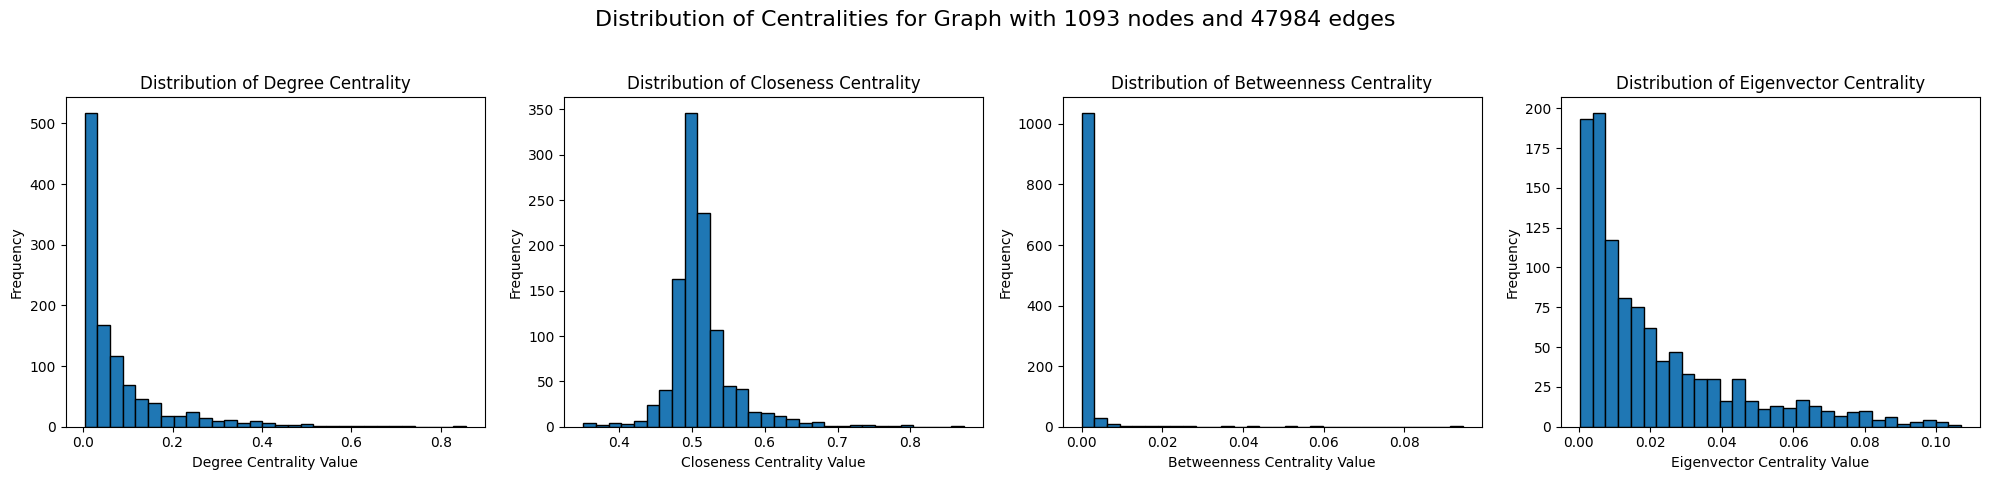

In [ ]:
centralities = compute_centralities(ingredient_graph)
df = pd.DataFrame(centralities)
plot_centrality_distributions(df, ingredient_graph)

Top Ingredients by Degree Centrality:
   Ingredient  Degree Centrality
10       salt           0.855311
6       onion           0.737179
7      pepper           0.733516
9      garlic           0.703297
31      sugar           0.691392
3      butter           0.658425
39      water           0.645604
11  olive oil           0.609890
34      flour           0.605311
63        oil           0.597070


C:\Users\vassa\AppData\Local\Temp\ipykernel_24368\1525896954.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


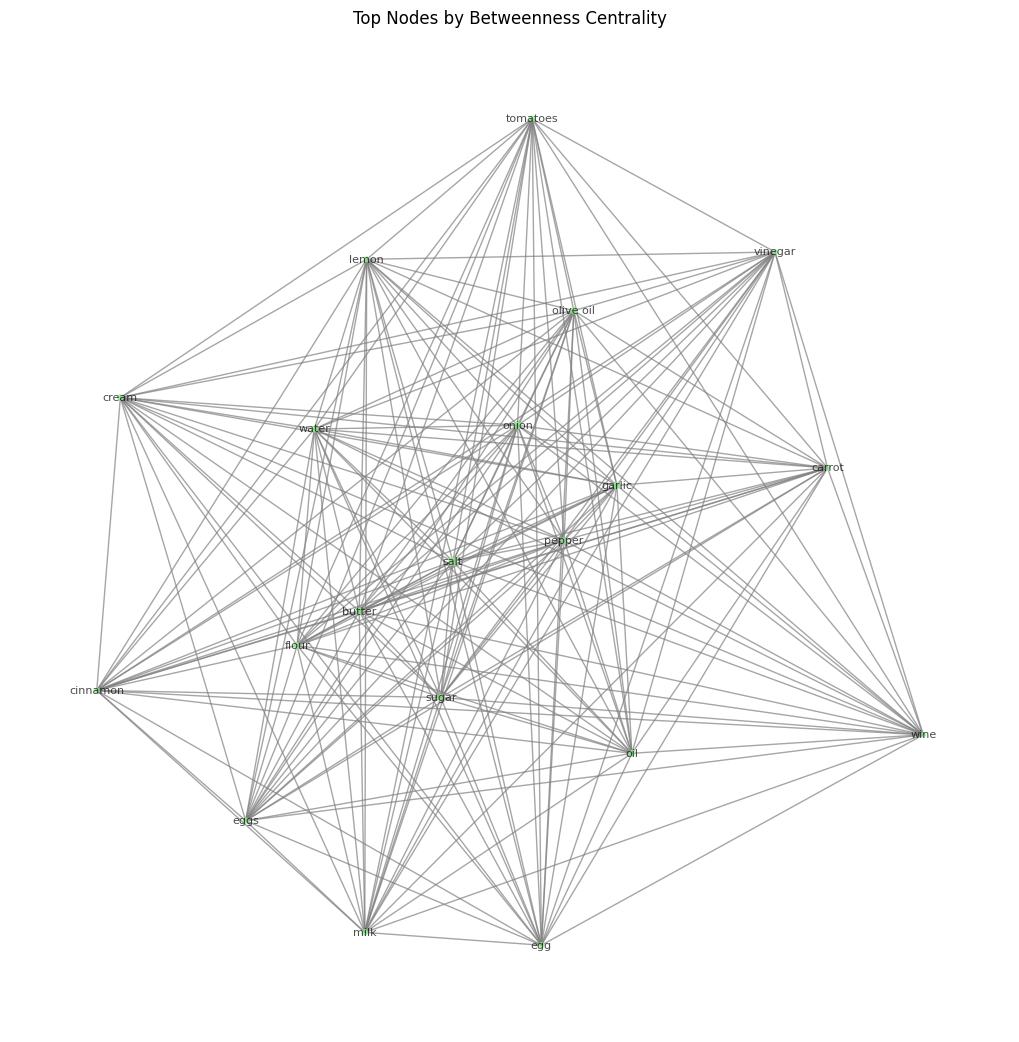

In [21]:
degree_centrality = nx.degree_centrality(ingredient_graph)
betweenness_centrality = nx.betweenness_centrality(ingredient_graph, weight='weight')
closeness_centrality = nx.closeness_centrality(ingredient_graph)
eigenvector_centrality = nx.eigenvector_centrality(ingredient_graph, weight='weight', max_iter=1000)

centrality_df = pd.DataFrame({
    'Ingredient': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
})

top_centrality = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)

print("Top Ingredients by Degree Centrality:")
print(top_centrality[['Ingredient', 'Degree Centrality']])

top_n = 20
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_nodes = [node for node, _ in top_betweenness]
top_graph = ingredient_graph.subgraph(top_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(top_graph, k=0.5, iterations=50)

node_size = [betweenness_centrality[node] * 1000 for node in top_graph.nodes()]
nx.draw(
    top_graph, pos, with_labels=True, node_color='lightgreen', node_size=node_size,
    font_size=8, edge_color='gray', alpha=0.7
)

plt.title("Top Nodes by Betweenness Centrality")
plt.tight_layout()
plt.show()
